In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import sys
import yaml
sys.path.append("../")
from datasets.CrossDomain import CrossDomain


In [130]:
with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_export.yaml", "r") as f:
    config = yaml.safe_load(f)


{'image': '/home/topkech/work/sat_datasets/cross-domain-compressed/maxar/maxar/ard_37_031133033101_2023-02-11_10300100E2901100-visual_16.jpg', 'name': 'ard_37_031133033101_2023-02-11_10300100E2901100-visual_16', 'image_cross_domain': '/home/topkech/work/sat_datasets/cross-domain-compressed/maxar/planet/ard_37_031133033101_2023-02-11_10300100E2901100-visual_16.jpg'}
(240, 320)
{'image': '/home/topkech/work/sat_datasets/cross-domain-compressed/maxar/maxar/ard_37_031133033101_2023-02-11_10300100E2901100-visual_17.jpg', 'name': 'ard_37_031133033101_2023-02-11_10300100E2901100-visual_17', 'image_cross_domain': '/home/topkech/work/sat_datasets/cross-domain-compressed/maxar/planet/ard_37_031133033101_2023-02-11_10300100E2901100-visual_17.jpg'}
(240, 320)
{'image': '/home/topkech/work/sat_datasets/cross-domain-compressed/maxar/maxar/ard_37_031133033101_2023-02-11_10300100E2901100-visual_18.jpg', 'name': 'ard_37_031133033101_2023-02-11_10300100E2901100-visual_18', 'image_cross_domain': '/home/t

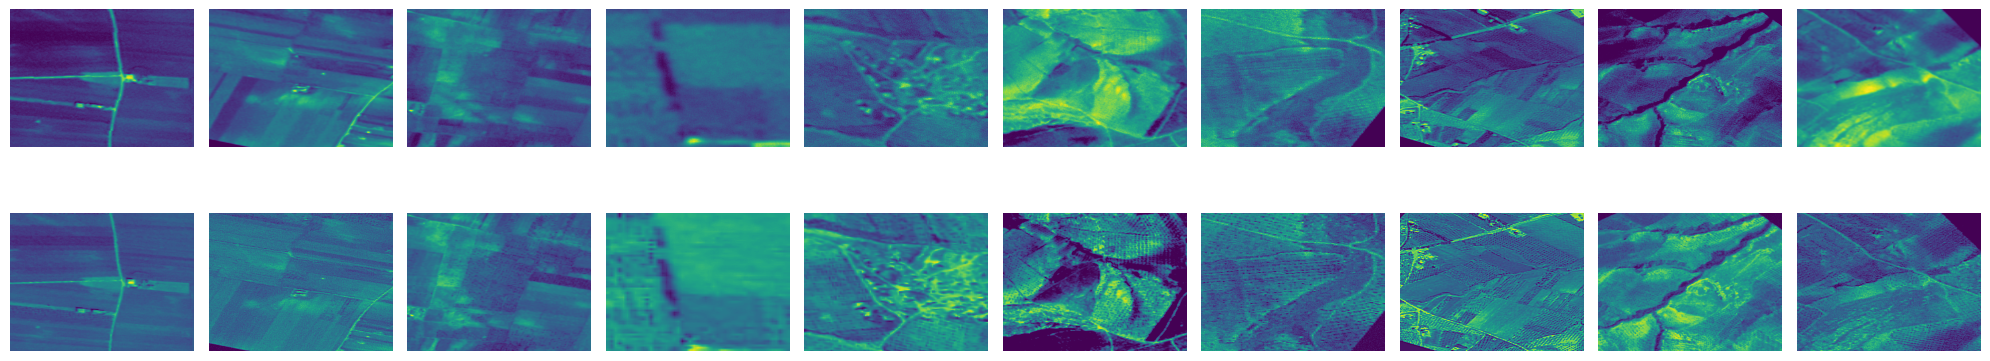

In [154]:
cd = CrossDomain(task="train", **config["data"])
fig, axs = plt.subplots(2, 10, figsize=(20,5))
for i in range(10):
    lr, hr = cd[i]
    axs[0][i].imshow(lr)
    axs[1][i].imshow(hr)
    axs[0][i].set_axis_off()
    axs[1][i].set_axis_off()
plt.tight_layout()


In [159]:
cd = CrossDomain(task="train", **config["data"])
print(cd[0].keys())
# for i in range(10):
#     print(cd[i])


dict_keys(['image', 'name', 'image_cross_domain', 'valid_mask', 'image_2D', 'homographies', 'inv_homographies'])
